Text(0.5, 0, 'x')

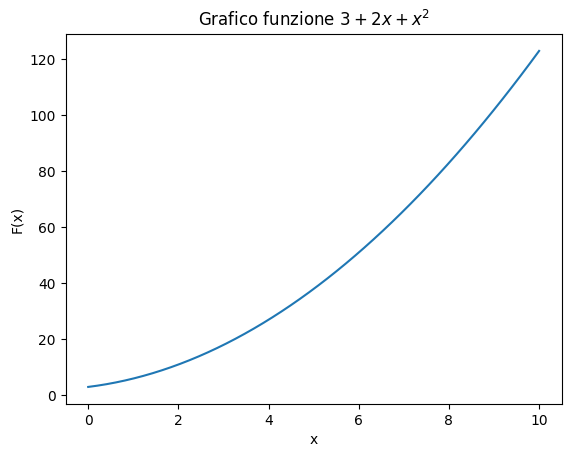

In [136]:
import matplotlib.pyplot as plt
import numpy as np
from myrand import generate_uniform,generate_TCL_ms,generate_range

#Punto 1) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


def func(x,a,b,c):

    return a + b*x + c*x**2

a_true = 3
b_true = 2
c_true = 1

x_coord = np.linspace(0,10)
y_coord = [func(x,a_true,b_true,c_true) for x in x_coord]

plt.plot(x_coord,y_coord)
plt.title('Grafico funzione ' + r'$3+2x+x^{2}$')
plt.ylabel('F(x)')
plt.xlabel('x')

In [137]:
# Punto 2) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

sample_size = 10
mu = 0
sigma = 10

x = generate_uniform(sample_size)
x.sort()

epsilon = generate_TCL_ms(mu,sigma,sample_size)

y = [func(x,a_true,b_true,c_true) + e for x,e in zip(x,epsilon)]


In [138]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

#Punto 3) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

least_squares = LeastSquares (x, y, sigma, func)
my_minuit = Minuit (least_squares, a = 0, b = 1, c = 1 )  # starting values for m and q

is_valid = my_minuit.valid
print ('success of the fit: ', is_valid)

my_minuit.migrad ()  # finds minimum of least_squares function

Q_squared = my_minuit.fval
print ('value of the fit Q-squared', Q_squared)
N_dof = my_minuit.ndof
print ('value of the number of degrees of freedom', N_dof)
my_minuit.hesse ()   # accurately computes uncertainties

success of the fit:  False
value of the fit Q-squared 8.169892100100935
value of the number of degrees of freedom 7.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.17 (χ²/ndof = 1.2)       │              Nfcn = 72               │
│ EDM = 4.24e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │     9     │     6     │            │            │         │         │       │
│ 1 │ b    │    20     │    40     │            │            │         │         │       │
│ 2 │ c    │    -20    │    40     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │    41.5    -170     140 │
│ b │    -170 1.3e+03  -1.3e3 │
│ c │     140  -1.3e3 1.3e+03 │
└───┴─────────────────────────┘

Text(0, 0.5, '# of event')

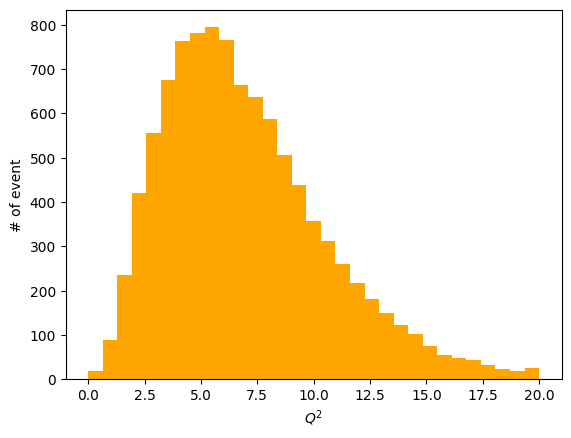

In [175]:
from math import ceil

#Punto 4) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

def sturges(N_events):
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))
    

NToys = 10000
Q_squared = []

for i in range (NToys):
    
    x = generate_uniform(sample_size)
    x.sort()

    epsilon = generate_TCL_ms(mu,sigma,sample_size)

    y = [func(x,a_true,b_true,c_true) + e for x,e in zip(x,epsilon)]

    
    least_squares = LeastSquares (x, y, sigma, func)
    my_minuit = Minuit (least_squares, a = 0, b = 1, c = 1 )  
    my_minuit.migrad ()  # finds minimum of least_squares function
    Q_squared.append(my_minuit.fval)


nbins = sturges(Q_squared)

xmin = 0
xmax = 20

bins_edges = np.linspace(xmin,xmax,nbins)

fig, ax = plt.subplots()

ax.hist(Q_squared,bins = bins_edges, color = 'orange', label = r'$\epsilon_{i}$ ' + 'generated with a gaussian distribution')
ax.set_xlabel(r'$Q^2$')
ax.set_ylabel('# of event')




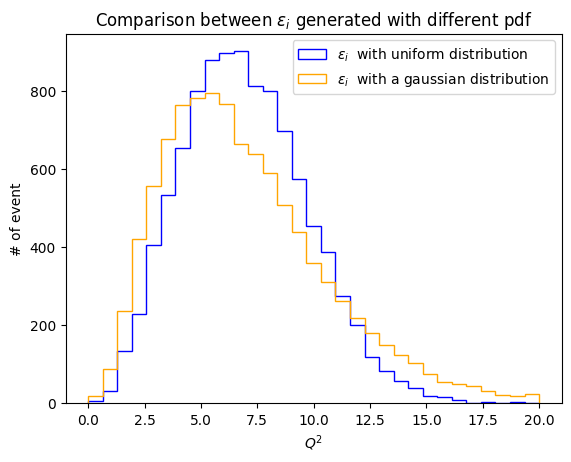

In [178]:
#Punto 5) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#we determine the xmin xmax for generating a uniform distribution we know that |b-a| = sigma*sqrt(12) and we choose a and b symmetrically

NToys = 10000

N = 10

Q1_squared = []

xmin = -1.73*sigma
xmax = 1.73*sigma

for i in range(NToys):

    x_coord1 = generate_uniform(N)
    x_coord1.sort()

    epsilon1 = generate_range(xmin,xmax,N)

    y_coord1 = [func(x,a_true,b_true,c_true) + e for x,e in zip(x_coord1,epsilon1)]

    least_squares1 = LeastSquares(x_coord1,y_coord1,sigma,func)
    my_minuit1 = Minuit(least_squares1,a = 0 , b = 1, c = 1 )
    my_minuit1.migrad()
    Q1_squared.append(my_minuit1.fval)
    
    

xBinMin = 0
xBinMax = 20

nbins1 = sturges(Q1_squared)

bins1_edges = np.linspace(xBinMin,xBinMax,nbins1)

fig1, ax = plt.subplots()

ax.hist(Q1_squared,bins = bins1_edges, color = 'blue', histtype= 'step', label = r'$\epsilon_{i}$ ' + ' with uniform distribution')
ax.hist(Q_squared,bins = bins_edges, color = 'orange',histtype = 'step', label = r'$\epsilon_{i}$ ' + ' with a gaussian distribution')
ax.set_xlabel(r'$Q^2$')
ax.set_ylabel('# of event')
ax.set_title('Comparison between ' + r'$\epsilon_i$ ' + 'generated with different pdf')
ax.legend()

<p> Punto 6) in funzione della distribuzione ottenuta per il Q2, si determini la soglia oltre la quale rigettare il
risultato del fit, dato il suo valore di Q2, per ottenere un p-value maggiore o uguale di 0.10.<p>

minimum threshold value:  10.626075166976019


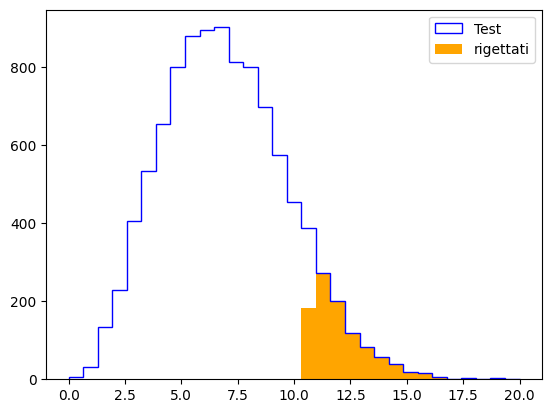

In [201]:
#Punto 6) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

from math import floor

Q1_squared.sort()
N_threshold = floor(0.9*NToys)

Q1_threshold = Q1_squared[0:N_threshold]

Q1_pvalue = [x for x in Q1_squared if x  not in Q1_threshold]

Q1_pvalue.sort()

print('minimum threshold value: ', min (Q1_pvalue))

fig2, ax = plt.subplots()

ax.hist(Q1_squared, bins = bins1_edges, histtype= 'step', color = 'blue', label = 'Test ')
ax.hist(Q1_pvalue, bins = bins1_edges, histtype= 'stepfilled', color = 'orange', label = 'rigettati')
ax.legend()
